In [28]:
import pandas as pd

df = pd.read_json("results/benchmark_results_8_cores.json")

print(df.head())

   mutation_rate  tournament_size  max_generations    mpi_strategy  \
0            0.1               10               10  MPINoMigration   
1            0.1               10               10  MPINoMigration   
2            0.1               10               10  MPINoMigration   
3            0.1               10               10  MPINoMigration   
4            0.1               10               10  MPINoMigration   

   population_size  num_cities  migration_size  migrations_count  \
0               50          20              10                 2   
1               50          20              10                 2   
2               50          20              10                 2   
3               50          20              10                 2   
4               50          20              10                 2   

  optimization_strategy  avg_time  avg_route_length  
0        NoOptimization  0.160569          2.864253  
1        NoOptimization  0.162446          2.425360  
2       

In [29]:
grouped_df = df.groupby(['mpi_strategy', 'optimization_strategy', 'mutation_rate', 'tournament_size', 'max_generations']).agg({
    'avg_time': 'mean',
    'avg_route_length': 'mean'
}).reset_index()

print(grouped_df)

best_result = grouped_df.loc[grouped_df['avg_route_length'].idxmin()]
print("Best Result:")
print(best_result)

fastest_result = grouped_df.loc[grouped_df['avg_time'].idxmin()]
print("Fastest Result:")
print(fastest_result)

grouped_df['performance_metric'] = grouped_df['avg_route_length'] * grouped_df['avg_time']
best_tradeoff = grouped_df.loc[grouped_df['performance_metric'].idxmin()]
print("Best Trade-Off Result:")
print(best_tradeoff)

           mpi_strategy     optimization_strategy  mutation_rate  \
0  MPIAllToAllMigration  ChristofidesOptimization            0.1   
1  MPIAllToAllMigration     GreedyTSPOptimization            0.1   
2  MPIAllToAllMigration            NoOptimization            0.1   
3        MPINoMigration  ChristofidesOptimization            0.1   
4        MPINoMigration     GreedyTSPOptimization            0.1   
5        MPINoMigration            NoOptimization            0.1   
6      MPIRingMigration  ChristofidesOptimization            0.1   
7      MPIRingMigration     GreedyTSPOptimization            0.1   
8      MPIRingMigration            NoOptimization            0.1   

   tournament_size  max_generations  avg_time  avg_route_length  
0               10               10  0.186436          2.405675  
1               10               10  0.189474          2.367120  
2               10               10  0.189532          2.512279  
3               10               10  0.162047          

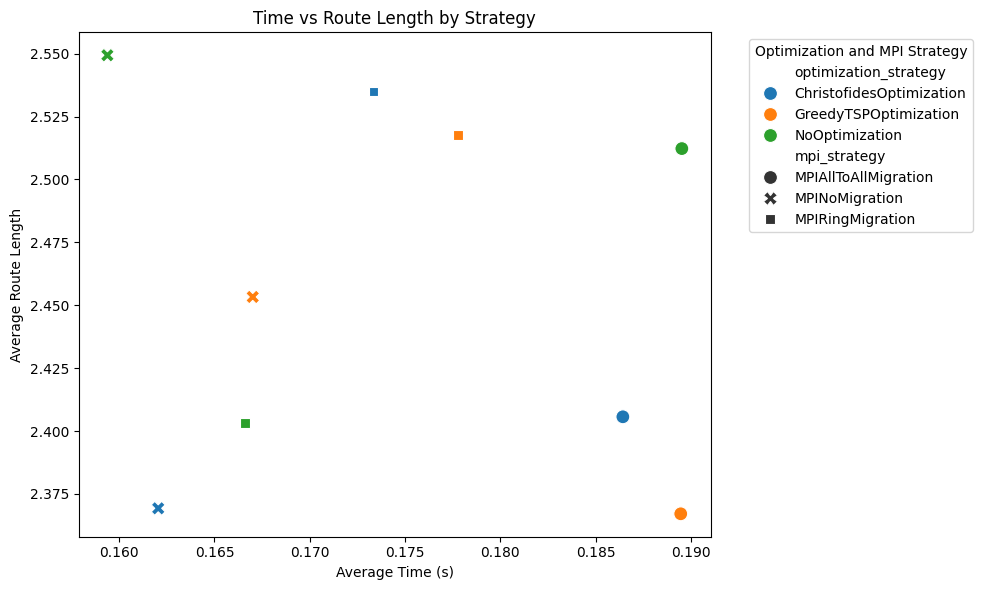

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='avg_time', y='avg_route_length', hue='optimization_strategy', style='mpi_strategy', s=100)

plt.title("Time vs Route Length by Strategy")
plt.xlabel("Average Time (s)")
plt.ylabel("Average Route Length")
plt.legend(title="Optimization and MPI Strategy", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


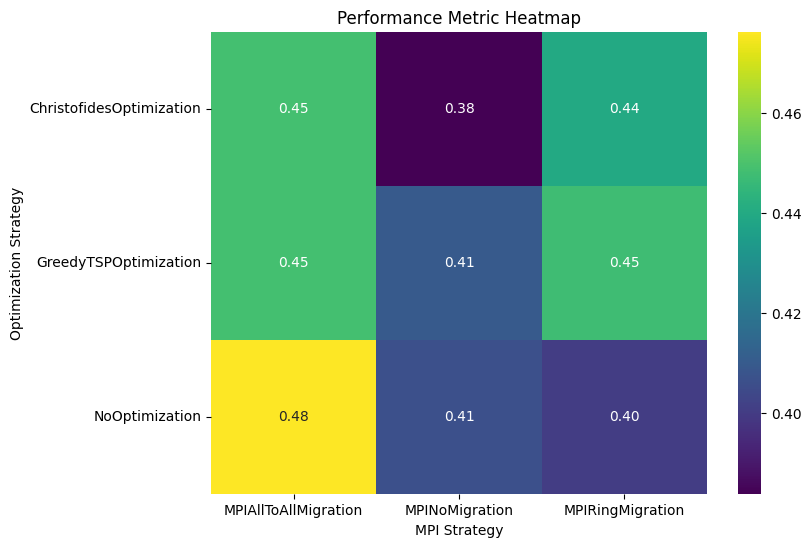

In [31]:
heatmap_data = grouped_df.pivot(index="optimization_strategy", columns="mpi_strategy", values="performance_metric")

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis")
plt.title("Performance Metric Heatmap")
plt.xlabel("MPI Strategy")
plt.ylabel("Optimization Strategy")
plt.show()


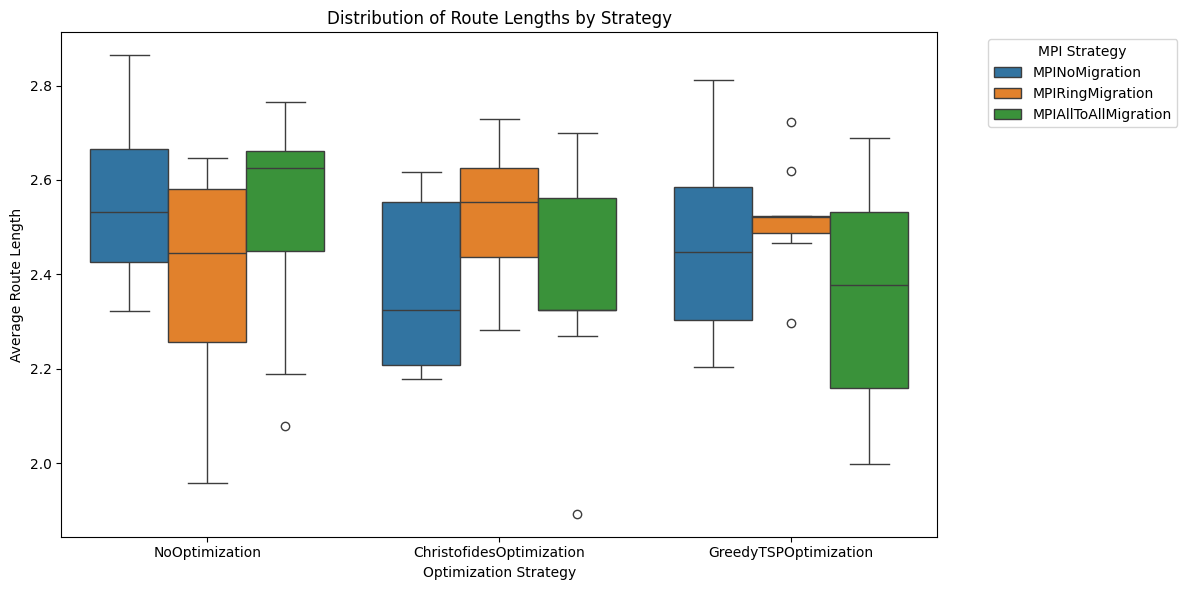

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='optimization_strategy', y='avg_route_length', hue='mpi_strategy')

plt.title("Distribution of Route Lengths by Strategy")
plt.xlabel("Optimization Strategy")
plt.ylabel("Average Route Length")
plt.legend(title="MPI Strategy", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
